# Figures for RSI manuscript

## FIG 3A SUMMATION EXPERIMENT (Kataoka 1979)

[0, 0.5, 1, 2, 3, 5]


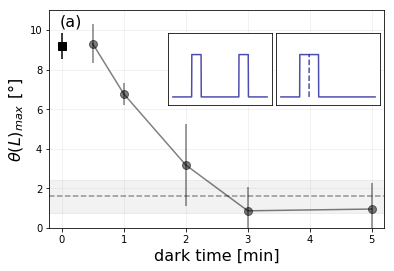

In [209]:
%matplotlib inline

from matplotlib import pyplot as plt
from math import e
import numpy as np

# /Users/jazz/Documents/research/p17_plant_integration/figs/fig2_new_summation/fig2a_Kataoka/KataokaFIG3_fixed.csv
ts = [0, 0.5, 1, 2, 3, 5]
cs = [9.19178, 9.30993, 6.77648, 3.17891, 0.859455, 0.948972]

cserr = [9.54-8.87, 9.75-8.76, 7.02-6.45, 4.22-2.14, 1.48-0.29, 1.65-0.31]

control = 1.6
control_err_up = 2.42
control_err_dn = 0.76

print ts

plt.errorbar(ts[0], cs[0], yerr=cserr[0], marker='s', c='k', ms=8)
#plt.plot(ts[1:], cs[1:], 'ok', ms=8, alpha=0.5)
plt.errorbar(ts[1:], cs[1:], yerr=cserr[1:], marker='o', ls='-', color='k', ms=8, alpha=0.5)

plt.plot([-0.2]+ts+[5.2], [control]*(len(ts)+2), 'k--', alpha=0.4)
plt.fill_between([-0.2]+ts+[5.2], control_err_up, control_err_dn, color='k', alpha=0.05)

plt.xlabel(r'dark time [min]', fontsize=16) #fontname='Times New Roman')
plt.ylabel(r'$\theta(L)_{max} \:\: [\degree]$', fontsize=16)

plt.ylim(0,11)
plt.xlim(-0.2, 5.2)
plt.grid(alpha=0.2)

plt.text(-0.03, 10.2, '(a)', fontsize=16)

# add an inset
a = plt.axes([0.40, 0.55, 0.24, 0.25])#, facecolor='y')
plt.plot(range(1000), [0]*200 + [1]*100 + [0]*400 + [1]*100 + [0]*200, c='darkblue', lw=1.5, alpha=0.7)
plt.ylim(-0.2, 1.5)
plt.xticks([])
plt.yticks([])

# add an inset
a = plt.axes([0.65, 0.55, 0.24, 0.25])#, facecolor='y')
plt.plot(range(1000), [0]*200 + [1]*200 + [0]*600, c='darkblue', lw=1.5, alpha=0.7)
plt.plot(range(299, 301), [0] + [1], '--', c='darkblue', lw=1.5, alpha=0.7)

plt.ylim(-0.2, 1.5)
plt.xticks([])
plt.yticks([])

plt.savefig('/Users/jazz/Documents/research/p17_plant_integration/figs/fig2_new_summation/fig2a_Kataoka/fig2a_Kataoka.pdf', dpi=600, transparent=True)
plt.show()

## FIG 3B SUMMATION SIMULATIONS

In [ ]:
#
# Summation of 2 consecutive pulses
#

In [176]:
execfile('/Users/jazz/research/plant_perception/funcs/180829_integration_unilateral.py')
    
lags  = [0, 1] + range(100, 1000, 100) + range(1000, 2200, 200)
NU    = 5.0
GAMMA = 0.5
Tc = 1/GAMMA
DURATION = 2 # 10 duration of pulse stimulus (in timesteps)
MAXT = 5000 #total duration (in num of timesteps) of the whole experiment (measurement time)

print  "only one pulse ",
f1 = [1]*DURATION + [0]*(MAXT-DURATION)
control_exp1   = unilateral_integration(stim=f1, EXP=1, tau=1., nu=NU, gamma=GAMMA) 
control_exp10  = unilateral_integration(stim=f1, EXP=1, tau=10., nu=NU, gamma=GAMMA) 
control_plaw15 = unilateral_integration(stim=f1, EXP=0, tau=-1.5, nu=NU, gamma=GAMMA)
print "control: 1 pulse, theta_max", control_exp1, control_exp10, control_plaw15


# resulting maximal theta for the different lags
sum_thetas_exp1 = [] 
sum_thetas_exp10 = []
sum_thetas_plaw15 = []

for i in range(len(lags)):
    print  "lag duration:", lags[i],
    f1 = [1]*DURATION + [0]*lags[i] + [1]*DURATION + [0]*(MAXT-2*DURATION-lags[i]) 
    theta_max_exp1   = unilateral_integration(stim=f1, EXP=1, tau=1., nu=NU, gamma=GAMMA) #tau=5., nu=NU, gamma=GAMMA)
    theta_max_exp10  = unilateral_integration(stim=f1, EXP=1, tau=10., nu=NU, gamma=GAMMA) #tau=50., nu=NU, gamma=GAMMA)
    theta_max_plaw15 = unilateral_integration(stim=f1, EXP=0, tau=-1.5, nu=NU, gamma=GAMMA)
    print ", maximal theta:", theta_max_exp1, theta_max_exp10, theta_max_plaw15
    sum_thetas_exp1.append(theta_max_exp1)
    sum_thetas_exp10.append(theta_max_exp10)
    sum_thetas_plaw15.append(theta_max_plaw15)


    

only one pulse  control: 1 pulse, theta_max 1.42983983951 3.79733038986 83.7904755534
lag duration: 0 , maximal theta: 2.85966160514 7.59465541637 152.164252641
lag duration: 1 , maximal theta: 2.85964159057 7.5946498937 148.332038228
lag duration: 100 , maximal theta: 2.81429018996 7.58203528338 128.600502493
lag duration: 200 , maximal theta: 2.6945844065 7.54605570242 121.964678641
lag duration: 300 , maximal theta: 2.53022560387 7.48859953121 115.842084756
lag duration: 400 , maximal theta: 2.35174449413 7.41223115333 110.353511773
lag duration: 500 , maximal theta: 2.13207811462 7.31997847296 105.567807896
lag duration: 600 , maximal theta: 1.96450669615 7.21506570999 101.489249871
lag duration: 700 , maximal theta: 1.83880203176 7.10066982047 98.0791032919
lag duration: 800 , maximal theta: 1.74381300755 6.97973251862 95.268907105
lag duration: 900 , maximal theta: 1.67160098973 6.85484671474 92.9336545995
lag duration: 1000 , maximal theta: 1.61643929593 6.72819359068 90.9992596

In [183]:
lags2  = range(2200, 5200, 200) #100, 500, 1000, 2000, 3000 ,4000, 5000]

for i in range(len(lags2)):
    print  "lag duration:", lags2[i],
    f1 = [1]*DURATION + [0]*lags2[i] + [1]*DURATION + [0]*(MAXT-2*DURATION-lags2[i]) 
    theta_max_exp1   = unilateral_integration(stim=f1, EXP=1, tau=1., nu=NU, gamma=GAMMA) #tau=5., nu=NU, gamma=GAMMA)
    theta_max_exp10  = unilateral_integration(stim=f1, EXP=1, tau=10., nu=NU, gamma=GAMMA) #tau=50., nu=NU, gamma=GAMMA)
    theta_max_plaw15 = unilateral_integration(stim=f1, EXP=0, tau=-1.5, nu=NU, gamma=GAMMA)
    print ", maximal theta:", theta_max_exp1, theta_max_exp10, theta_max_plaw15
    sum_thetas_exp1.append(theta_max_exp1)
    sum_thetas_exp10.append(theta_max_exp10)
    sum_thetas_plaw15.append(theta_max_plaw15)



 lag duration: 2200 , maximal theta: 1.43882590273 5.42947479239 84.1630594838
lag duration: 2400 , maximal theta: 1.43528440887 5.27106684381 84.016521008
lag duration: 2600 , maximal theta: 1.43313932194 5.12784757697 83.9275679724
lag duration: 2800 , maximal theta: 1.43183907377 4.99852637392 83.8736017308
lag duration: 3000 , maximal theta: 1.43105092644 4.88183730435 83.8408726656
lag duration: 3200 , maximal theta: 1.43057325946 4.77658358564 83.8210275246
lag duration: 3400 , maximal theta: 1.43028440283 4.68165401878 83.8089960257
lag duration: 3600 , maximal theta: 1.43010931205 4.59603355829 83.801702258
lag duration: 3800 , maximal theta: 1.43000318058 4.51880164151 83.7972808163
lag duration: 4000 , maximal theta: 1.42993884888 4.4491243018 83.7946006383
lag duration: 4200 , maximal theta: 1.42989985414 4.38625199418 83.7929760028
lag duration: 4400 , maximal theta: 1.42987621744 4.2530253165 83.7919912126
lag duration: 4600 , maximal theta: 1.42986189003 3.79733038986 83.

In [194]:
#
# save all data
#
import pickle
lagsnew = lags+lags2
f = open('/Users/jazz/Documents/research/p17_plant_integration/figs/fig2_new_summation/fig2b_sims/integration_summation_sims_T5000_lags5000_exp1.pkl', 'w')
pickle.dump([control_exp1, sum_thetas_exp1] ,f)
f.close
f = open('/Users/jazz/Documents/research/p17_plant_integration/figs/fig2_new_summation/fig2b_sims/integration_summation_sims_T5000_lags5000_exp10.pkl', 'w')
pickle.dump([control_exp10, sum_thetas_exp10] ,f)
f.close
f = open('/Users/jazz/Documents/research/p17_plant_integration/figs/fig2_new_summation/fig2b_sims/integration_summation_sims_T5000_lags5000_plaw15.pkl', 'w')
pickle.dump([control_plaw15, sum_thetas_plaw15] ,f)
f.close
f = open('/Users/jazz/Documents/research/p17_plant_integration/figs/fig2_new_summation/fig2b_sims/integration_summation_sims_T5000_lags5000_lagsnew.pkl', 'w')
pickle.dump(lagsnew ,f)
f.close

<function close>

In [4]:
#
# read all data (if needed)
#

import pickle

lags  = [0, 1] + range(100, 1000, 100) + range(1000, 2200, 200)
lags2  = range(2200, 5200, 200) #100, 500, 1000, 2000, 3000 ,4000, 5000]
lagsnew = lags+lags2

f = open('/Users/jazz/Documents/research/p17_plant_integration/figs/fig2_new_summation/fig2b_sims/integration_summation_sims_T5000_lags5000_exp1.pkl')
[control_exp1, sum_thetas_exp1] = pickle.load(f)
f.close()
f = open('/Users/jazz/Documents/research/p17_plant_integration/figs/fig2_new_summation/fig2b_sims/integration_summation_sims_T5000_lags5000_exp10.pkl')
[control_exp10, sum_thetas_exp10] = pickle.load(f)
f.close()
f = open('/Users/jazz/Documents/research/p17_plant_integration/figs/fig2_new_summation/fig2b_sims/integration_summation_sims_T5000_lags5000_plaw15.pkl')
[control_plaw15, sum_thetas_plaw15] = pickle.load(f)
f.close()
#f = open('/Users/jazz/Documents/research/p17_plant_integration/figs/fig2_new_summation/fig2b_sims/integration_summation_sims_T5000_lags5000_lagsnew.pkl')
#lagsnew = pickle.load(f)
#f.close()

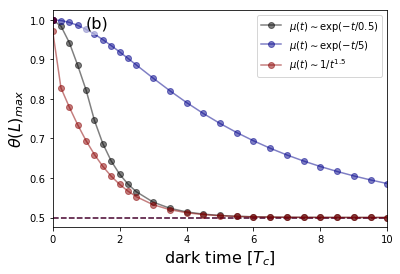

In [15]:
lagsnew = lags+lags2
dt=0.005
Tc = 1/0.5

from matplotlib import pyplot as plt
exp1_init = sum_thetas_exp1[0]
plt.plot([x*dt/Tc for x in lagsnew], [x/exp1_init for x in sum_thetas_exp1], 'o-', color='black', alpha=0.5, label=r'$\mu(t) \sim \exp(-t/0.5)$')
plt.plot([x*dt/Tc for x in lagsnew], [control_exp1/exp1_init]*len(lagsnew), '--', color='black', alpha=0.5)

exp10_init = sum_thetas_exp10[0]
plt.plot([x*dt/Tc for x in lagsnew], [x/exp10_init for x in sum_thetas_exp10], 'o-', color="darkblue", alpha=0.5, label=r'$\mu(t) \sim \exp(-t/5)$')
plt.plot([x*dt/Tc for x in lagsnew], [control_exp10/exp10_init]*len(lagsnew), '--', color="darkblue", alpha=0.5)

plaw15_init = sum_thetas_plaw15[0]
plt.plot([x*dt/Tc for x in lagsnew], [(x-control_plaw15)/(2*(plaw15_init-control_plaw15)) + 0.5 for x in sum_thetas_plaw15], 'o-', color="darkred", alpha=0.5, label=r'$\mu(t) \sim 1/t^{1.5}$')
plt.plot([x*dt/Tc for x in lagsnew], [0.5]*len(lagsnew), '--', color="darkred", alpha=0.5)

plt.legend()
#plt.ylim(0, 6)
plt.xlim(0, int(20/Tc))
plt.xticks(range(0, int(25/Tc), int(5/Tc)))
plt.xlabel(r'dark time $[T_c]$', fontsize=16) #fontname='Times New Roman')
plt.ylabel(r'$\theta(L)_{max}$', fontsize=16)

plt.text(1.0, 0.98, '(b)', fontsize=16, bbox=dict(fc='white', ec="none", alpha=0.5))

plt.savefig('/Users/jazz/Documents/research/p17_plant_integration/figs/fig2_new_summation/fig2b_sims/integration_summation_sims_T5000_lags5000.pdf', dpi=600, Transparent=True)

plt.show()



# Table 1. Reciprocity simulations

In [9]:
execfile('/Users/jazz/research/plant_perception/funcs/180829_integration_unilateral.py')
    
NU    = 5.0
GAMMA = 0.5
MAXT = 5000 #total duration (in num of timesteps) of the whole experiment (measurement time)


ints = [2, 4, 10, 20, 25, 50]
durs = [50, 25, 10, 5, 4, 2]



# resulting maximal theta for the different ratios
rec_thetas_exp1 = [] 

for i in range(len(durs)):
    print  "stim duration:", durs[i], "stim magnitude:", ints[i]
    f1 = [ints[i]]*durs[i] + [0]*(MAXT-durs[i]) 
    theta_max_exp1   = unilateral_integration(stim=f1, EXP=1, tau=1., nu=NU, gamma=GAMMA)
    print ", maximal theta:", theta_max_exp1
    rec_thetas_exp1.append(theta_max_exp1)
    



stim duration: 50 stim magnitude: 2
, maximal theta: 71.1904756615
stim duration: 25 stim magnitude: 4
, maximal theta: 71.4050960607
stim duration: 10 stim magnitude: 10
, maximal theta: 71.474195166
stim duration: 5 stim magnitude: 20
, maximal theta: 71.4858429456
stim duration: 4 stim magnitude: 25
, maximal theta: 71.4873549875
stim duration: 2 stim magnitude: 50
, maximal theta: 71.4896762122


# Fig 4 - Orbovic and Poff

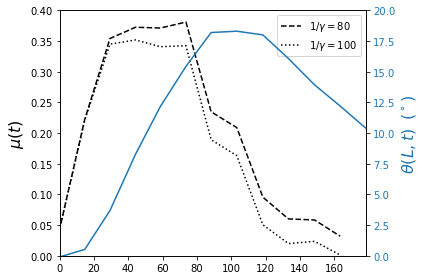

In [190]:
%matplotlib inline
from matplotlib import pyplot as plt
from math import log, e
from scipy.interpolate import interp1d
import numpy as np

%execfile('/Users/jazz/research/funcs/statistics.py')
f = open('/Users/jazz/research/plant_perception/data/digitized_data/digi_orbovic1991/Fig6.csv')
figa = f.readlines()
f.close()
figa = [[float(y) for y in x.split(',')] for x in figa[1:]]

xs = [x[0] for x in figa]
ys = [x[1] for x in figa]

dydt = [(ys[i+1]-ys[i])/(xs[i+1]-xs[i]) for i in range(len(xs[:-1]))]
gamma = 1./80
mut = [dydt[i] + gamma*ys[i] for i in range(len(dydt))]

gamma160 = 1./100
mut160 = [dydt[i] + gamma160*ys[i] for i in range(len(dydt))]



fig, ax1 = plt.subplots()

#color = 'tab:blue'
ax1.set_ylabel(r'$\mu(t)$', color='k', fontsize=16)  # we already handled the x-label with ax1
ax1.plot(xs[:-1], mut, color='k', ls='--', label=r'$1/\gamma=80$')
ax1.plot(xs[:-1], mut160, color='k', ls=':', label=r'$1/\gamma=100$')
ax1.legend()
ax1.tick_params(axis='y', labelcolor='k')

#ax1.plot([-15] + xs + [195], [0 for x in xs] + [0,0], color=color, ls='-')
#ax1.plot(xs, [0 for x in xs], color='k', lw=2, ls='-')

ax1.set_ylim(0.0, 0.4)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


#color = 'tab:red'
color = 'tab:blue'
ax2.set_xlabel('time (min)', fontsize=16)
ax2.set_ylabel(r'$\theta(L,t)\;\;(^\circ)$', color=color, fontsize=16)
ax2.plot(xs, ys, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax2.set_ylim(0, 20)

ax2.set_xlim(0, xs[-1])

ax2.set_xlabel("time (min)")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig('/Users/jazz/Documents/research/p17_plant_integration/figs/OrbovicPoff_response_func_new.pdf', dpi=600, Transparent=True)
plt.show()

# New Fig. 2 panel a (response to pulse)

NameError: name 'fig' is not defined

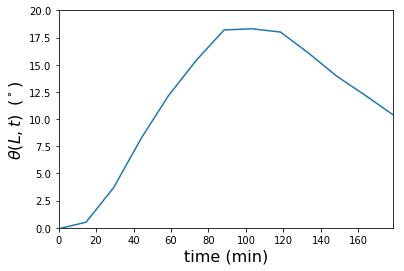

In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
from math import log, e
from scipy.interpolate import interp1d
import numpy as np

execfile('/Users/jazz/research/funcs/statistics.py')
f = open('/Users/jazz/research/plant_perception/data/digitized_data/digi_orbovic1991/Fig6.csv')
figa = f.readlines()
f.close()
figa = [[float(y) for y in x.split(',')] for x in figa[1:]]

xs = [x[0] for x in figa]
ys = [x[1] for x in figa]



plt.xlabel('time (min)', fontsize=16)
plt.ylabel(r'$\theta(L,t)\;\;(^\circ)$', fontsize=16)
plt.plot(xs, ys)#, color=color)
#plt.tick_params(axis='y')#, labelcolor=color)

plt.ylim(0, 20)

plt.xlim(0, xs[-1])

plt.xlabel("time (min)")

plt.tight_layout()  # otherwise the right y-label is slightly clipped

#plt.savefig('/Users/jazz/Documents/research/p17_plant_integration/figs/OrbovicPoff_response_func_new.pdf', dpi=600, Transparent=True)
plt.show()

# Fig. 2 a (simulation of response to pulse)

In [1]:
execfile('/Users/jazz/research/plant_perception/funcs/180829_integration_unilateral.py')
    
lags  = [0, 1] + range(100, 1000, 100) + range(1000, 2200, 200) #100, 500, 1000, 2000, 3000 ,4000, 5000]
#lags = [0, 1, 100, 1000] # lag time between two pulses (in num of timesteps)
NU    = 5.0
GAMMA = 0.5
DURATION = 2 # 10 duration of pulse stimulus (in timesteps)
MAXT = 5000 #total duration (in num of timesteps) of the whole experiment (measurement time)

print  "only one pulse ",
f1 = [1]*DURATION + [0]*(MAXT-DURATION)

#print "exp 1"
#control_exp1_all   = unilateral_integration(stim=f1, EXP=1, tau=1., nu=NU, gamma=GAMMA, return_max = 0) 
print "exp 10"
control_exp10_all  = unilateral_integration(stim=f1, EXP=1, tau=10., nu=NU, gamma=GAMMA, return_max = 0) 
#print "plaw 15"
#control_plaw15_all = unilateral_integration(stim=f1, EXP=0, tau=-1.5, nu=NU, gamma=GAMMA, return_max = 0)
    

only one pulse  exp 1
0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 exp 10
0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 plaw 15
0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900


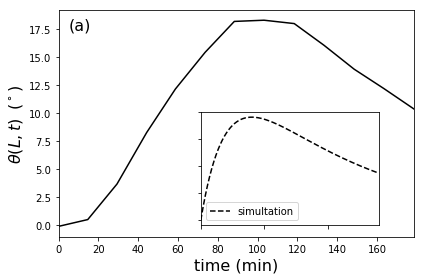

In [63]:
%matplotlib inline
from matplotlib import pyplot as plt
from math import log, e
from scipy.interpolate import interp1d
import numpy as np
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)


%execfile('/Users/jazz/research/funcs/statistics.py')
f = open('/Users/jazz/research/plant_perception/data/digitized_data/digi_orbovic1991/Fig6.csv')
figa = f.readlines()
f.close()
figa = [[float(y) for y in x.split(',')] for x in figa[1:]]

xs = [x[0] for x in figa]
ys = [x[1] for x in figa]


fig, ax1 = plt.subplots()

ax1.set_xlabel('time (min)', fontsize=16)
ax1.set_ylabel(r'$\theta(L,t)\;\;(^\circ)$', fontsize=16)
ax1.plot(xs, ys, color='k', label='experiment')
ax1.tick_params(axis='y')
ax1.set_xlim(0, xs[-1])
ax1.set_xlabel("time (min)")

ax1.text(5, 17.5, '(a)', fontsize=16)

# plot inset: simulation
ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax1, [0.4,0.05,0.5,0.5])
ax2.set_axes_locator(ip)
dt = 0.005
ax2.plot([x*dt for x in range(MAXT-1)], control_exp10_all, c='k', ls='--', label='simultation')
#ax2.tick_params(axis='y', labelcolor='k')
ax2.legend()
ax2.set_yticklabels([])
ax2.set_xticklabels([])
ax2.set_xlim(0, 14)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig('/Users/jazz/Documents/research/p17_plant_integration/figs/fig2_pulse_exp_sim_v1.pdf', dpi=600, Transparent=True)
plt.show()

# Fig 2b, reciprocity

[1000, 1000, 1001.0, 1000, 1000]


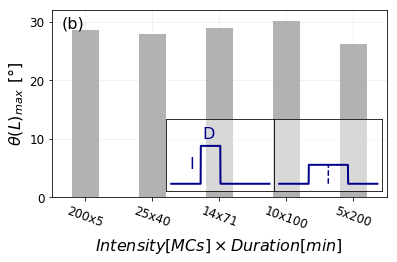

In [109]:
%matplotlib inline

from matplotlib import pyplot as plt

# the intensities scale is not obvious in the paper... so taking 
# manually only values i'm sure of.

ins = [200, 25, 14, 10, 5] # meter candles
#
# convert 1 mc = 1.464128843338e-7 W/cm^2 = 1.464128843338e-7 * 10,000 W/ m^2 = 0.00146412884 W/ m^2
# https://www.translatorscafe.com/unit-converter/en/illumination/4-11/foot-candle-watt%2Fcentimeter%C2%B2%20(at%20555%20nm)/
#
#ins_W = [x*0.00146412884 for x in ins]
#print ins_W
ts = [5, 40, 71.5, 100, 200]
labels = ["200x5", "25x40", "14x71", "10x100", "5x200"]
#labels_W = ["0.292825768:5", "0.036603221:40", "0.02049780376:71", "0.0146412884:100", "0.0073206442:200"]
#labels_W = ["29.2 x 5", "3.65 x 40", "2.05 x 71", "1.46 x 100", "0.73 x 200"] #  10-2 W/m^2 (after rounding so dose is 146)
inds = [1, 5, 7, 8, 9]
print [ins[i]*ts[i] for i in range(len(ins))]

f = open('/Users/jazz/Documents/research/p17_plant_integration/figs/fig2/Briggs_curv_time.csv')
aa = f.readlines()
f.close()
#ts = [float(x.split(',')[0]) for x in aa[1:]]
cs = [float(x.split(',')[1]) for x in aa[1:]]
cs = [cs[i] for i in inds]

#plt.plot(ins, cs, 'o-')
#plt.plot(range(5), cs, marker='o', ls='-', color='k', ms=8, alpha=0.5)
plt.bar(range(5), cs, 0.4, color="black", alpha=0.3)


plt.ylim(0, 32)
plt.xlim(-0.5, 4.5)
plt.yticks(range(0, 40, 10),fontsize=12)
#plt.xticks(range(5), labels)
#plt.xticks(range(5), labels_W, rotation=-20, fontsize=12)
plt.xticks(range(5), labels, rotation=-20, fontsize=12)


plt.xlabel(r'$Intensity [MCs] \times Duration  [min]$', fontsize=16)
#plt.xlabel(r'intensity $[10^{-2} W / m^2 s]$ x duration $[s]$', fontsize=16)
plt.ylabel(r'$\theta(L)_{max} \:\: [\degree]$', fontsize=16)

plt.grid(alpha=0.2)
plt.text(-0.35, 29, '(b)', fontsize=16)
#plt.text(2.2, 35, r'dose = 1.46 $W/m^2$', fontsize=16)

# add space at the bottom, since xlabel gets cutt off
plt.gcf().subplots_adjust(bottom=0.23)


# add an inset
#a = plt.axes([0.40, 0.15, 0.24, 0.25])#, facecolor='y')
# changed y axis since the adjusment for the bottom screwed things up
#a = plt.axes([0.49, 0.25, 0.2, 0.2])#, facecolor='y') 
a = plt.axes([0.39, 0.25, 0.25, 0.25])#, facecolor='y') 
a.patch.set_alpha(0.5)
plt.plot(range(1000), [0]*300 + [1]*200 + [0]*500, c='darkblue', lw=2)#, alpha=0.7)
plt.ylim(-0.2, 1.7)
plt.xticks([])
plt.yticks([])

plt.text(320, 1.2, r'D', color='darkblue', fontsize=16)#, family='serif')
plt.text(180, 0.4, r'I', color='darkblue', fontsize=16)#, family='serif')

# add an inset
#a = plt.axes([0.65, 0.15, 0.24, 0.25])#, facecolor='y')
#a = plt.axes([0.69, 0.25, 0.2, 0.2])
a = plt.axes([0.64, 0.25, 0.25, 0.25])
a.patch.set_alpha(0.5)
plt.plot(range(1000), [0]*300 + [0.5]*400 + [0]*300, c='darkblue', lw=2)#, alpha=1)
plt.plot(range(499, 501), [0] + [0.5], '--', c='darkblue', lw=1.5)#, alpha=0.7)


plt.ylim(-0.2, 1.7)
plt.xticks([])
plt.yticks([])



plt.savefig('/Users/jazz/Documents/research/p17_plant_integration/figs/new_fig2b_reciprocity_exp.pdf', dpi=600)

plt.show()